# 📌 Extracción de datos

Para iniciar el análisis, necesitamos importar los datos de la API de Telecom X.

Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [ ]:
import pandas as pd
import numpy as np
import requests

# requests es una biblioteca de Python que te permite hacer solicitudes HTTP, Con ella puedes conectarte a APIs o sitios web para obtener (o enviar) datos, especialmente en formato JSON.

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url) # El método get() envía una solicitud HTTP de tipo GET a una URL, para obtener los datos y almacenarlos
datos = response.json() # Convierte el contenido en un dict de Python

In [ ]:
# Datos mostrados en un dict de Python, similar a la estructura de JSON

datos
'''
{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
...
Vista previa, documentada como comentario debido a la gran cantidad de datos mostrados al ejecutar
'''

"\n{'customerID': '0002-ORFBO',\n  'Churn': 'No',\n  'customer': {'gender': 'Female',\n   'SeniorCitizen': 0,\n   'Partner': 'Yes',\n   'Dependents': 'Yes',\n   'tenure': 9},\n  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},\n  'internet': {'InternetService': 'DSL',\n   'OnlineSecurity': 'No',\n   'OnlineBackup': 'Yes',\n   'DeviceProtection': 'No',\n   'TechSupport': 'Yes',\n   'StreamingTV': 'Yes',\n   'StreamingMovies': 'No'},\n  'account': {'Contract': 'One year',\n   'PaperlessBilling': 'Yes',\n   'PaymentMethod': 'Mailed check',\n   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},\n...\nVista previa, documentada como comentario debido a la gran cantidad de datos mostrados al ejecutar\n"

In [ ]:
df = pd.json_normalize(datos) # Normalizamos los datos para almacenarlos en un dataframe

In [ ]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🔧 Transformacion de datos

## Conociendo el conjunto de datos

Es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna

**Diccionario de datos**

- `customerID:` número de identificación único de cada cliente
- `Churn:` si el cliente dejó o no la empresa
- `gender:` género (masculino y femenino)
- `SeniorCitizen:` información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner:` si el cliente tiene o no una pareja
- `Dependents:` si el cliente tiene o no dependientes
- `tenure:` meses de contrato del cliente
- `PhoneService:` suscripción al servicio telefónico
- `MultipleLines:` suscripción a más de una línea telefónica
- `InternetService:` suscripción a un proveedor de internet
- `OnlineSecurity:` suscripción adicional de seguridad en línea
- `OnlineBackup:` suscripción adicional de respaldo en línea
- `DeviceProtection:` suscripción adicional de protección del dispositivo
- `TechSupport:` suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV:` suscripción de televisión por cable
- `StreamingMovies:` suscripción de streaming de películas
- `Contract:` tipo de contrato
- `PaperlessBilling:` si el cliente prefiere recibir la factura en línea
- `PaymentMethod:` forma de pago
- `Charges.Monthly:` total de todos los servicios del cliente por mes
- `Charges.Total:` total gastado por el cliente

## Comprobacion y manejo de incoherencias en los datos

In [ ]:
# Explorando las columnas del dataset y verificar sus tipos de datos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Identificar las columnas más relevantes para el análisis de evasión.

columnas = list(df.columns)

indices = [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,18,19,20]

columnas_relevantes = []

for i in indices:
  columnas_relevantes.append(columnas[i])

In [ ]:
columnas_relevantes

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [ ]:
# Remplazamos nuestro dataframe con las correciones e incluyendo solo las columnas relevantes

df = df[columnas_relevantes]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.tenure            7267 non-null   int64  
 5   phone.PhoneService         7267 non-null   object 
 6   phone.MultipleLines        7267 non-null   object 
 7   internet.InternetService   7267 non-null   object 
 8   internet.OnlineSecurity    7267 non-null   object 
 9   internet.OnlineBackup      7267 non-null   object 
 10  internet.DeviceProtection  7267 non-null   object 
 11  internet.TechSupport       7267 non-null   object 
 12  internet.StreamingTV       7267 non-null   object 
 13  internet.StreamingMovies   7267 non-null   objec

### Analisis de columnas

In [ ]:
# Verificamos que la columnas del tipo objecto no tenga valores vacios que no nos permitan convertirlos

df.eq('').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0
internet.OnlineBackup,0


In [ ]:
# Hay valores vacios en Churn

df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
# Por lo que los reemplazaremos por No

df['Churn'] = df['Churn'].replace('', 'No')
df['Churn'].value_counts()

,count
Churn,
No,5398
Yes,1869


In [ ]:
# Volvemos a verificar que no tengamos mas vacios para Churn

df.eq('').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0
internet.OnlineBackup,0


In [ ]:
# Ahora necesitamos analizar cada columna del tipo object, Ya que necesitamos convertir algunas columnas a bool

# Seleccionamos columnas tipo object (excepto customerID)
cols_dtype_object = df.select_dtypes(include='object').drop(columns=['customerID'])

# Mostramos valores únicos por columna
def ImprimirValoresColumnas():
  for col in cols_dtype_object:
    print(('------------------------------------'))
    print(f'Columna: {col}\n')
    print(df[col].value_counts(dropna=False))

ImprimirValoresColumnas()

------------------------------------
Columna: Churn

Churn
No     5398
Yes    1869
Name: count, dtype: int64
------------------------------------
Columna: customer.gender

customer.gender
Male      3675
Female    3592
Name: count, dtype: int64
------------------------------------
Columna: phone.PhoneService

phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64
------------------------------------
Columna: phone.MultipleLines

phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64
------------------------------------
Columna: internet.InternetService

internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
------------------------------------
Columna: internet.OnlineSecurity

internet.OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64
------------------------------------
Columna:

Con este analisis podemos ver que tenemos mas de dos opciones (cosa que solo necesitamos saber Si o No) para las siguientes columnas:

- phone.MultipleLines: 'No phone service'
- internet.OnlineSecurity: 'No internet service'
- internet.OnlineBackup: 'No internet service'
- internet.DeviceProtection: 'No internet service'
- internet.TechSupport: 'No internet service'
- internet.StreamingTV: 'No internet service'
- internet.StreamingMovies: 'No internet service'

Todas estas columnas tienen las opciones de Yes, No y una extra mencionada en la lista anterior, convertiremos todas estas opciones a No, ya que este numero de personas no tienen internet, por lo que es un valor mas a sumar en No

Y tambien podemos ver que la columna account.Charges.Total tiene un valor vacio.

In [ ]:
# vemos los valores de la columna account.Charges.Total, ya que hay un valor vacio que no permite la conversion

df['account.Charges.Total'].value_counts()

,count
account.Charges.Total,
20.2,11
,11
19.75,9
19.55,9
19.9,9
...,...
1993.2,1
72.1,1
1237.85,1


In [ ]:
#Convertimos este valor vacio a 0

df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ',str(0))

In [ ]:
# Volvemos a verificar los datos, ahora con el valor vacio convertido a 0, pero siempre como dtype object
# Luego haremos la conversion de todos los strings a int

df['account.Charges.Total'].value_counts()

,count
account.Charges.Total,
20.2,11
0,11
19.75,9
19.55,9
19.9,9
...,...
1993.2,1
72.1,1
1237.85,1


In [ ]:
# convertimos toda la columna del tipo object a float

df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)

In [ ]:
# Ahora necesitamos Modificar algunas columnas del tipo object a bool

cols_bool = ['Churn', 'customer.SeniorCitizen', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

In [ ]:
# Descubrimos que varias columnas tienen un valor diferente a "Yes" y "No", la mayoria relacionada a internet: 'No internet service', y una de ellas 'No phone service'
# Reemplazaramos estas dos cadenas de texto a 'No'

df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')

In [ ]:
#Volvemos a Ejecutar nuestro codigo que imprima los valores de cada columna deseada

ImprimirValoresColumnas()

------------------------------------
Columna: Churn

Churn
No     5398
Yes    1869
Name: count, dtype: int64
------------------------------------
Columna: customer.gender

customer.gender
Male      3675
Female    3592
Name: count, dtype: int64
------------------------------------
Columna: phone.PhoneService

phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64
------------------------------------
Columna: phone.MultipleLines

phone.MultipleLines
No     4202
Yes    3065
Name: count, dtype: int64
------------------------------------
Columna: internet.InternetService

internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
------------------------------------
Columna: internet.OnlineSecurity

internet.OnlineSecurity
No     5189
Yes    2078
Name: count, dtype: int64
------------------------------------
Columna: internet.OnlineBackup

internet.OnlineBackup
No     4763
Yes    2504
Name: count, dtype: int64
---------------

In [ ]:
# Ahora si podemos convertir todos los valores de Yes y No, de strings a booleanos

for col in cols_bool:
  df[col] = df[col].replace({'Yes': True, 'No': False})

/tmp/ipython-input-22-3102684433.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': True, 'No': False})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.tenure            7267 non-null   int64  
 5   phone.PhoneService         7267 non-null   bool   
 6   phone.MultipleLines        7267 non-null   bool   
 7   internet.InternetService   7267 non-null   object 
 8   internet.OnlineSecurity    7267 non-null   bool   
 9   internet.OnlineBackup      7267 non-null   bool   
 10  internet.DeviceProtection  7267 non-null   bool   
 11  internet.TechSupport       7267 non-null   bool   
 12  internet.StreamingTV       7267 non-null   bool   
 13  internet.StreamingMovies   7267 non-null   bool 

In [ ]:
# Verificando si hay valores duplicados

df.duplicated().sum()

np.int64(0)

## Agregando la Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [ ]:
df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

In [ ]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,9,True,False,DSL,False,True,False,True,True,False,One year,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,0,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,0,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,1,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,1,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,Mailed check,83.9,267.40,2.80


## Estandarización y transformación de datos (opcional)

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [ ]:
# Convirtiendo los valores booleanos a binarios

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.tenure            7267 non-null   int64  
 5   phone.PhoneService         7267 non-null   bool   
 6   phone.MultipleLines        7267 non-null   bool   
 7   internet.InternetService   7267 non-null   object 
 8   internet.OnlineSecurity    7267 non-null   bool   
 9   internet.OnlineBackup      7267 non-null   bool   
 10  internet.DeviceProtection  7267 non-null   bool   
 11  internet.TechSupport       7267 non-null   bool   
 12  internet.StreamingTV       7267 non-null   bool   
 13  internet.StreamingMovies   7267 non-null   bool 

In [ ]:
for cols in cols_bool:
  df[cols] = df[cols].astype(np.int64)

In [ ]:
# Verificando que los datos se corrigieron de manera correcta

df['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


Este paso se nos facilito debido a que anteriormente convertimos los valores de "Yes" y "No" de Strings a booleanos primero, y ahora convertimos booleanos a binarios convirtiendolos a int64

Sin embargo si hubieramos saltado este paso, podriamos facilmente utilizar `.map()`

```
df['columna'] = df['columna'].map({'Yes': 1, 'No': 0})
```





In [ ]:
# Renombrando las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.tenure            7267 non-null   int64  
 5   phone.PhoneService         7267 non-null   int64  
 6   phone.MultipleLines        7267 non-null   int64  
 7   internet.InternetService   7267 non-null   object 
 8   internet.OnlineSecurity    7267 non-null   int64  
 9   internet.OnlineBackup      7267 non-null   int64  
 10  internet.DeviceProtection  7267 non-null   int64  
 11  internet.TechSupport       7267 non-null   int64  
 12  internet.StreamingTV       7267 non-null   int64  
 13  internet.StreamingMovies   7267 non-null   int64

In [ ]:
nuevas_columnas = ['ID_Cliente', 'Evasion', 'Genero' , 'Tercera_Edad', 'Meses_Contrato', 'Servicio_Telefonico', 'Lineas_Multiples', 'Servicio_Internet', 'Servicio_Seguridad_Linea', 'Servicio_Respaldo_Linea', 'Servicio_Proteccion_Dispositivo', 'Servicio_Tecnico', 'Servicio_TV', 'Servicio_Peliculas', 'Contrato', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias']

In [ ]:
df.columns = nuevas_columnas

In [ ]:
df.columns

Index(['ID_Cliente', 'Evasion', 'Genero', 'Tercera_Edad', 'Meses_Contrato',
       'Servicio_Telefonico', 'Lineas_Multiples', 'Servicio_Internet',
       'Servicio_Seguridad_Linea', 'Servicio_Respaldo_Linea',
       'Servicio_Proteccion_Dispositivo', 'Servicio_Tecnico', 'Servicio_TV',
       'Servicio_Peliculas', 'Contrato', 'Metodo_Pago', 'Cargo_Mensual',
       'Cargo_Total', 'Cuentas_Diarias'],
      dtype='object')

# 📊 Carga y Analisis de datos

## Análisis Descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [ ]:
df.describe()

,Evasion,Tercera_Edad,Meses_Contrato,Servicio_Telefonico,Lineas_Multiples,Servicio_Seguridad_Linea,Servicio_Respaldo_Linea,Servicio_Proteccion_Dispositivo,Servicio_Tecnico,Servicio_TV,Servicio_Peliculas,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,64.720098,2277.182035,2.157292
std,0.437115,0.369074,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


## Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.head()

,ID_Cliente,Evasion,Genero,Tercera_Edad,Meses_Contrato,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,Servicio_Seguridad_Linea,Servicio_Respaldo_Linea,Servicio_Proteccion_Dispositivo,Servicio_Tecnico,Servicio_TV,Servicio_Peliculas,Contrato,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,9,1,0,DSL,0,1,0,1,1,0,One year,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,Mailed check,83.9,267.40,2.80


In [ ]:
evasion = df['Evasion'].value_counts()

evasion

,count
Evasion,
0,5398
1,1869


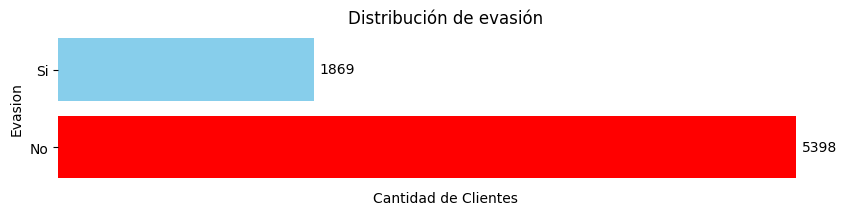

In [ ]:
fig, ax = plt.subplots(figsize=(10,2))

ax.barh(evasion.index, evasion.values, color=['red', 'skyblue'])
ax.set_yticks([0,1])
ax.set_yticklabels(['No', 'Si'])
ax.set_xticks([])
ax.set_xlabel('Cantidad de Clientes')
ax.set_ylabel('Evasion')
ax.set_title('Distribución de evasión')

for i,j in enumerate(evasion):
  ax.text(j + 40, i, str(j), ha='left', va='center')

ax.set_frame_on(False)

plt.show()

## Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [ ]:
clientes_perdidos = df[df['Evasion'] == 1]

In [ ]:
clientes_perdidos.head()

,ID_Cliente,Evasion,Genero,Tercera_Edad,Meses_Contrato,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,Servicio_Seguridad_Linea,Servicio_Respaldo_Linea,Servicio_Proteccion_Dispositivo,Servicio_Tecnico,Servicio_TV,Servicio_Peliculas,Contrato,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
2,0004-TLHLJ,1,Male,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,Mailed check,83.9,267.40,2.80
18,0022-TCJCI,1,Male,1,45,1,0,DSL,1,0,1,0,0,1,One year,Credit card (automatic),62.7,2791.50,2.09
19,0023-HGHWL,1,Male,1,1,0,0,DSL,0,0,0,0,0,0,Month-to-month,Electronic check,25.1,25.10,0.84


### Clientes perdidos por genero

In [ ]:
clientes_perdidos_genero = clientes_perdidos['Genero'].value_counts()
clientes_perdidos_genero

,count
Genero,
Female,939
Male,930


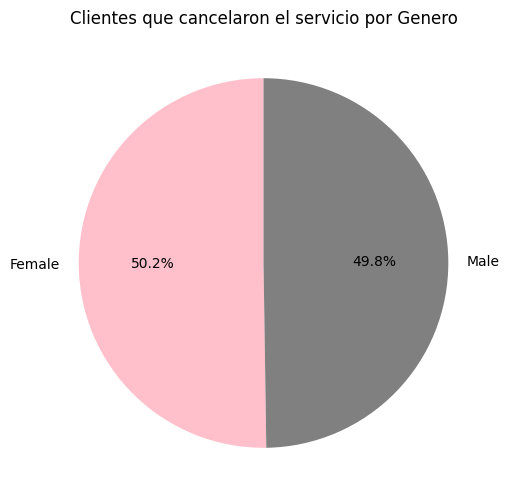

In [ ]:
fig, axs = plt.subplots(figsize=(8,6))

axs.pie(clientes_perdidos_genero, labels=clientes_perdidos_genero.index, autopct='%1.1f%%',colors=['pink', 'gray'], startangle=90)
axs.set_title('Clientes que cancelaron el servicio por Genero')

plt.show()

### Clientes perdidos por tipo de contrato

In [ ]:
clientes_perdidos_contrato = clientes_perdidos['Contrato'].value_counts()

clientes_perdidos_contrato

,count
Contrato,
Month-to-month,1655
One year,166
Two year,48


In [ ]:
clientes_perdidos_contrato = clientes_perdidos_contrato.reset_index()
clientes_perdidos_contrato

,Contrato,count
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [ ]:
import seaborn as sns

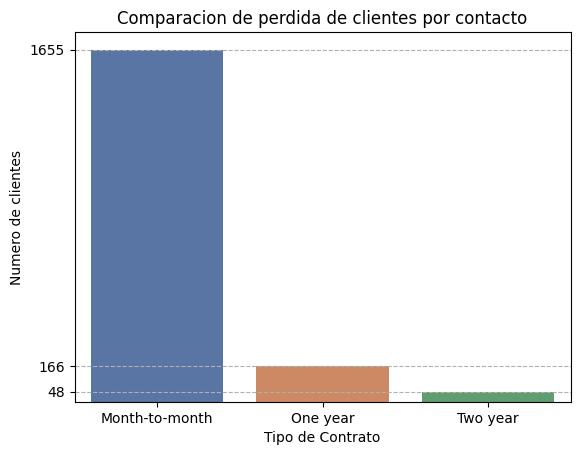

In [ ]:
sns.barplot(data=clientes_perdidos_contrato, x='Contrato', y='count', palette='deep', hue='Contrato', legend=False)
plt.title('Comparacion de perdida de clientes por contacto')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Numero de clientes')
plt.yticks(clientes_perdidos_contrato['count'])
plt.grid(axis='y', linestyle='--')

plt.show()

### Clientes perdidos por Metodo de Pago

In [ ]:
clientes_perdidos_metodo = clientes_perdidos['Metodo_Pago'].value_counts().sort_values(ascending=False)
clientes_perdidos_metodo = clientes_perdidos_metodo.reset_index()

In [ ]:
clientes_perdidos_metodo

,Metodo_Pago,count
0,Electronic check,1071
1,Mailed check,308
2,Bank transfer (automatic),258
3,Credit card (automatic),232


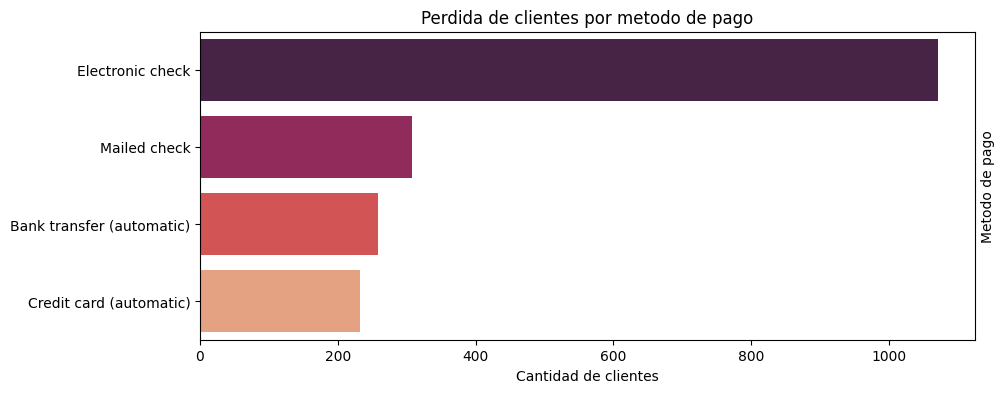

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(data=clientes_perdidos_metodo, x='count', y='Metodo_Pago', palette='rocket', hue='Metodo_Pago', legend=False)
ax.set_title('Perdida de clientes por metodo de pago')
ax.set_xlabel('Cantidad de clientes')
ax.set_ylabel('Metodo de pago')
ax.yaxis.set_label_position('right')

plt.show()

## Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [ ]:
variables_numericas = df[['Evasion', 'Meses_Contrato', 'Cargo_Total']]

In [ ]:
variables_numericas['Evasion'] = variables_numericas['Evasion'].map({0: 'No', 1: 'Si'})

/tmp/ipython-input-134-2145402353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_numericas['Evasion'] = variables_numericas['Evasion'].map({0: 'No', 1: 'Si'})


In [ ]:
variables_numericas.head()

,Evasion,Meses_Contrato,Cargo_Total
0,No,9,593.30
1,No,9,542.40
2,Si,4,280.85
3,Si,13,1237.85
4,Si,3,267.40


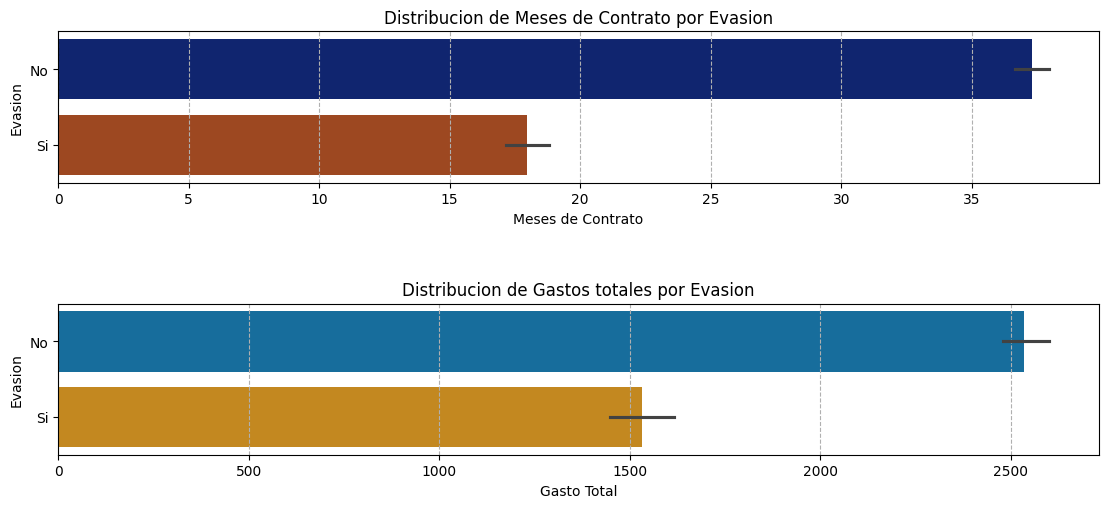

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,6))
sns.barplot(data=variables_numericas, x='Meses_Contrato', y='Evasion', palette='dark', hue = 'Evasion', legend=False, ax=ax[0])
sns.barplot(data=variables_numericas, x='Cargo_Total', y='Evasion', palette='colorblind', hue = 'Evasion', legend=False, ax=ax[1])

ax[0].set_title('Distribucion de Meses de Contrato por Evasion')
ax[0].set_xlabel('Meses de Contrato')
ax[0].xaxis.grid(True, linestyle='--')

ax[1].set_title('Distribucion de Gastos totales por Evasion')
ax[1].set_xlabel('Gasto Total')
ax[1].xaxis.grid(True, linestyle='--')

plt.tight_layout(pad=4.0)
plt.show()

# 📋 Informe Final

**Introduccion:**

Como parte del proyecto "Churn de Clientes" en el analisis de datos de la base de clientes en Telecom X, la empresa se enfrenta a una alta tasa de clientes cancelando sus servicios.

Nuestro objetivo es comprender las razones debidas a este alto numero de cancelaciones.

**limpieza y Tratamiento de datos**

Como primera etapa del analisis, importamos los datos de nuestra base de datos obtenida en un link, esta base se encontraba en el formato JSON, por lo que al momento de importar nos encontramos que la base de datos contiene informacion anidada, por lo que era necesario recurrir a la normalizacion.

Al momento de limpiar y procesar los datos, realizabamos este paso por medio de un requests, dicha biblioteca ha sido importada y por medio del metodo get, obtenemos el formato de la base de datos en lectura de JSON por lo que se nos facilita normalizar la informacion, una vez tenemos nuestro dataframe almacenamos dicha informacion en una variable df.

**Análisis Exploratorio de Datos:**

Durante nuestro Analisis, nos encontramos con la alta tasa de cancelaciones que la empresa ha sufrido, para un total de 5398 cancelaciones.

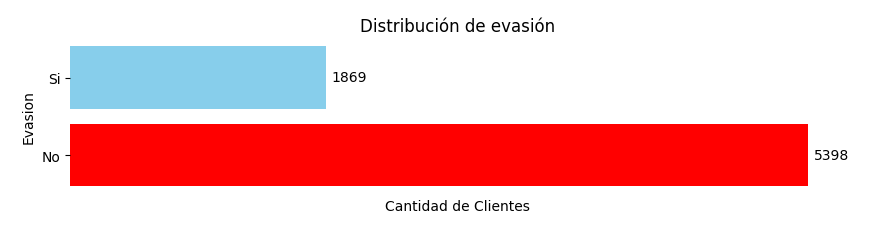

Uno de los principales factores que influyen directamente a la alta cancelacion de contratos se ve reflejada en la duracion de los mismos, los clientes que adquiren un servicio cuyo contrato es de mes a mes son mas proprensos a cancelar el servicio, esto debido a la facilidad de los mismos para cancelarse.

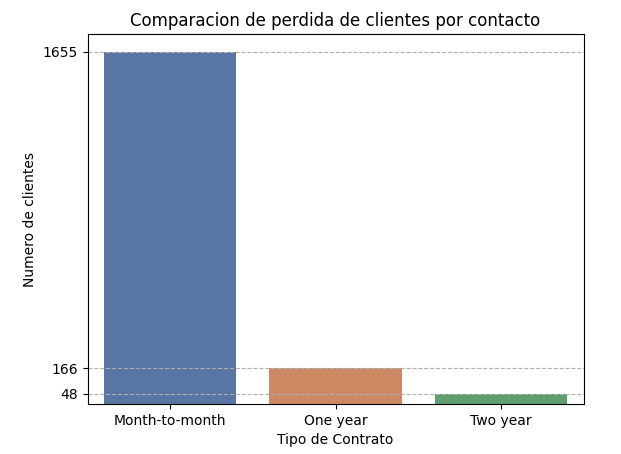

A su vez, los clientes que realizan sus pagos por medio de cheques electronicos aportan la mayor cantidad de cancelaciones, ¿Presenta este metodo de pago problemas a los usuarios?, ¿Es eficiente, amigable y de facil acesso para los usuarios?, En caso de presentar un problema en el pago, ¿Recibe el usuario algun tipo de penalizacion que podria causar un discontento con respecto al metodo de pago?

Los datos nos indican que es un metodo muy recurrido por los usuarios, que a su vez terminan cancelando, por lo que recomendaria investigar con mas detalles este metodo de pago.

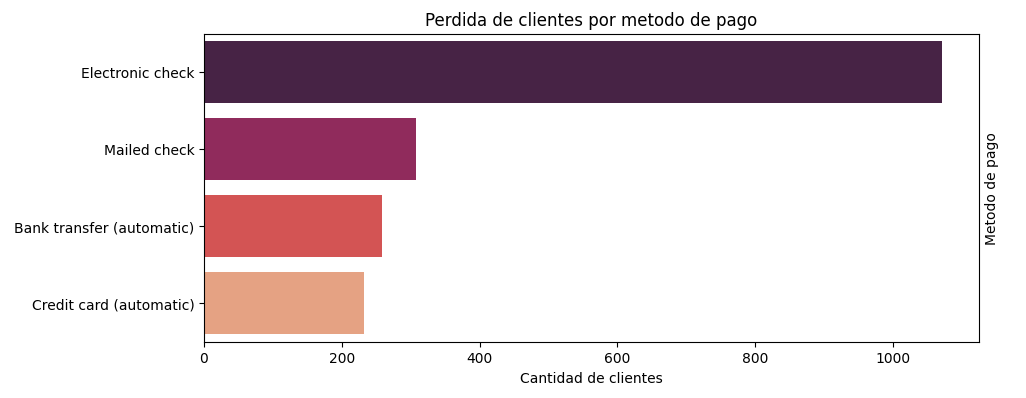

Por ultimo, otro factor que podria estar influyendo a que los clientes tomen la decision de cancelar sus servicios sea el total de gastos invertido en los contratos, ¿Existen clientes que posean mas de un servicio?, ¿Tienen estos clientes la posibilidad de optar por algun 'paquete' de servicios?, ¿Cuanto tiempo ha sido el usuario un cliente antes de la cancelacion?, este tipo de datos podria darnos mas visibilidad ya que los clientes con un promedio de 2500 en gastos totales, aproximadamente, optan por cancelar el servicio.

Ademas es importante plantear una ultima pregunta, ¿Hay usuarios cancelando al termino de un contrato por un año?, en el siguiente grafico podemos observar que los clientes que han cancelado el servicio, tienen en promedio mas de 35 meses utilizando el servicio.

Si bien muchos clientes cancelan en los primeros meses (como vimos con contratos mensuales), también es interesante notar que hay cancelaciones luego de más de 35 meses de servicio, como se aprecia en el siguiente gráfico.

Esto sugiere que no solo los contratos cortos son vulnerables, sino que también podría haber problemas en el proceso de renovación tras largos periodos de fidelidad. Aquí surge otra pregunta clave:

¿Por qué un cliente que ha permanecido más de 3 años decide cancelar en lugar de renovar?

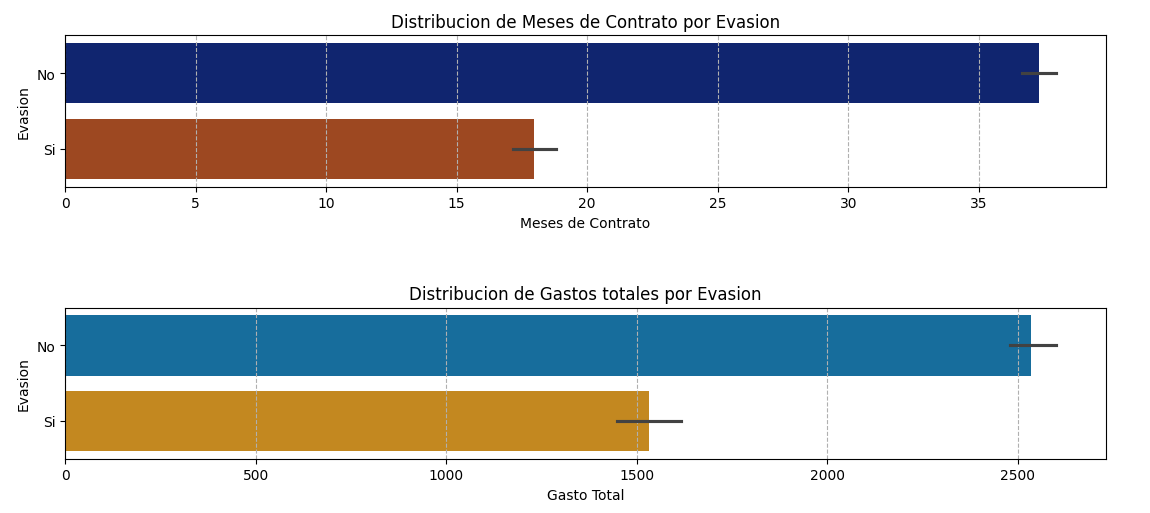

**Conclusiones:**

1. El análisis muestra que hay varios factores que influyen en la cancelación de servicios: tipo de contrato, método de pago, gastos acumulados y duración de la relación con el cliente. Cada uno de estos puntos representa una oportunidad para que la empresa intervenga proactivamente y mejore sus tasas de retención.

2. Los contratos mensuales presentan el mayor riesgo de cancelación.
El método de pago mediante cheques electrónicos está vinculado a una alta tasa de cancelaciones.

3. Incluso los clientes de alto valor, con mayor cantidad de gastos, están optando por dejar el servicio.

4. Existen cancelaciones luego de largos periodos de fidelidad

**Recomendaciones:**

1. Reforzar estrategias de retencion para contratos mensuales. Ofrecer incentivos como descuentos progresivos por permanencia, mejoras de servicio sin costo o acceso a paquetes exclusivos, esto podría ayudar a transformar contratos mensuales en relaciones más duraderas.

2. Investigar a fondo la experiencia del usuario con cheques electrónicos. Realizar encuestas que permitan darnos mas detalles si este método presenta algun problema para el usuario. En caso de encontrar problema, considerar promover métodos de pago más amigables (como pagos automáticos, como Transferencias Bancarias o Tarjetas de credito que suelen ser las menores relacionadas a la cantidad de cancelaciones).

3. Implementar paquetes o descuentos para clientes con mayores valores de gastos acumulados, y evitar la cancelación por motivos económicos.